# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
crop_df = pd.read_csv('/content/crop_yield.csv')
crop_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **1. Memahami Struktur Data**

In [ ]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


Dari hasil output crop_df.info(), kita dapat melihat bahwa dataset ini terdiri atas 19689 baris dan 10 kolom. Berikut adalah detail dari setiap kolom.

1. **Crop**: Nama tanaman yang dibudidayakan, bertipe data object.

2. **Crop_Year**: Tahun di mana tanaman tersebut ditanam, bertipe data int64.

3. **Season**: Musim tanam, bertipe data object.

4. **State**: Negara bagian di India tempat tanaman tersebut dibudidayakan, bertipe data object.

5. **Area**: Total luas lahan (dalam hektar), bertipe data float64.

6. **Production**: Jumlah hasil produksi tanaman (in metric tons), bertipe data int64.

7. **Annual_Rainfall**: Curah hujan tahunan yang diterima di wilayah tempat tanaman tersebut dibudidayakan (in mm), bertipe data float64.

8. **Fertilizer**: Jumlah pupuk yang digunakan untuk tanaman tersebut (dalam kilogram), bertipe data float64.

9. **Pesticide**: Jumlah pestisida yang digunakan untuk tanaman tersebut (dalam kilogram), bertipe data float64.

10. **Yield**: Hasil tanaman yang dihitung per unit area (produksi per luas lahan), bertipe data float64.

Semua kolom memiliki nilai non-null, artinya tidak ada missing values yang perlu ditangani. Dataset ini siap untuk dianalisis lebih lanjut.

**Menampilkan statistik deskriptif dari dataset untuk kolom numerik**

In [ ]:
crop_df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


## **2. Menangani Data yang Hilang**

In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = crop_df.isnull().sum()
missing_values[missing_values > 0]

,0


di dataset tidak ada data yang hilang.

## **3. Analisis Distribusi dan Korelasi**

Setiap fitur numerik dianalisis melalui histogram yang menunjukkan sebaran nilai-nilai dalam fitur tersebut. Grafik-grafik ini membantu dalam memahami rentang nilai, kecenderungan pusat, serta potensi outliers pada setiap fitur numerik. Dengan mengetahui distribusi setiap fitur maka, bisa memutuskan langkah selanjutnya dalam pemrosesan data.

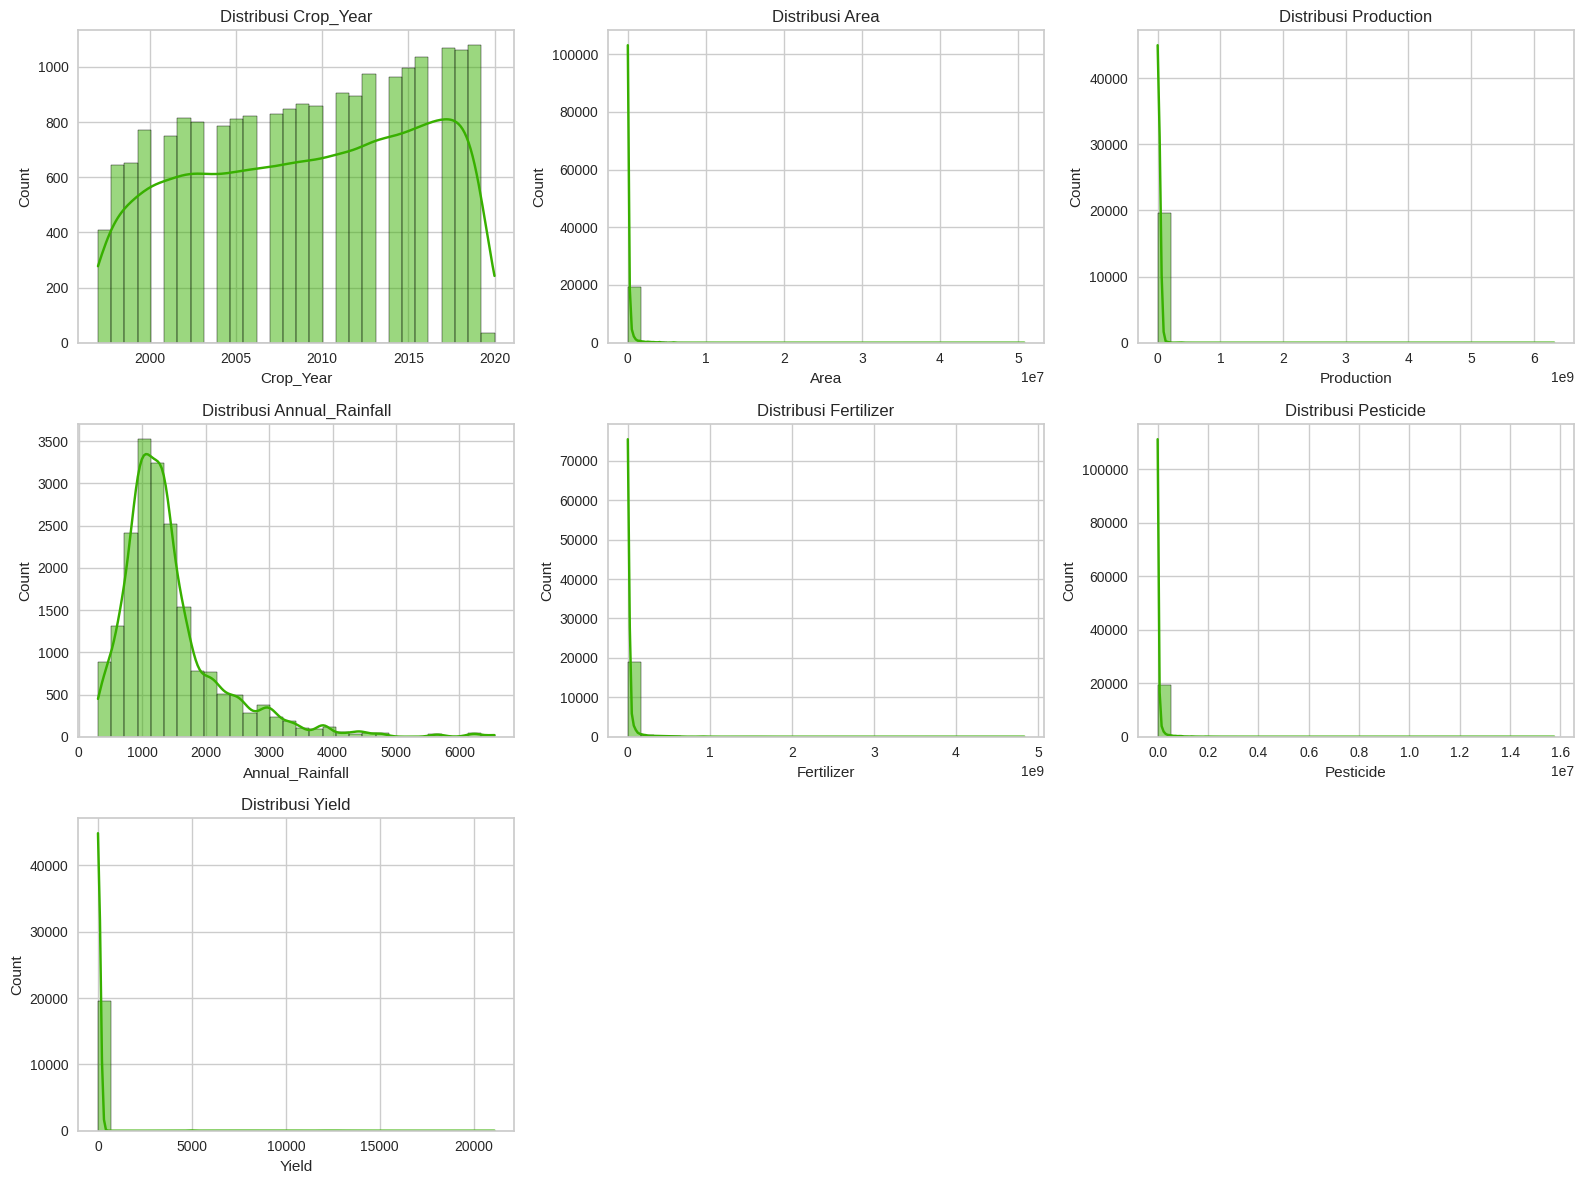

In [ ]:
# Distribusi fitur numerik
num_features = crop_df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(crop_df[column], bins=30, kde=True, color='#38b000')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

## **4. Visualisasi Data**

Distribusi fitur kategorikal diperiksa dengan menggunakan grafik batang horizontal. Grafik ini memperlihatkan frekuensi setiap kategori dalam fitur kategorikal, membantu untuk memahami seberapa sering masing-masing kategori muncul dalam dataset.

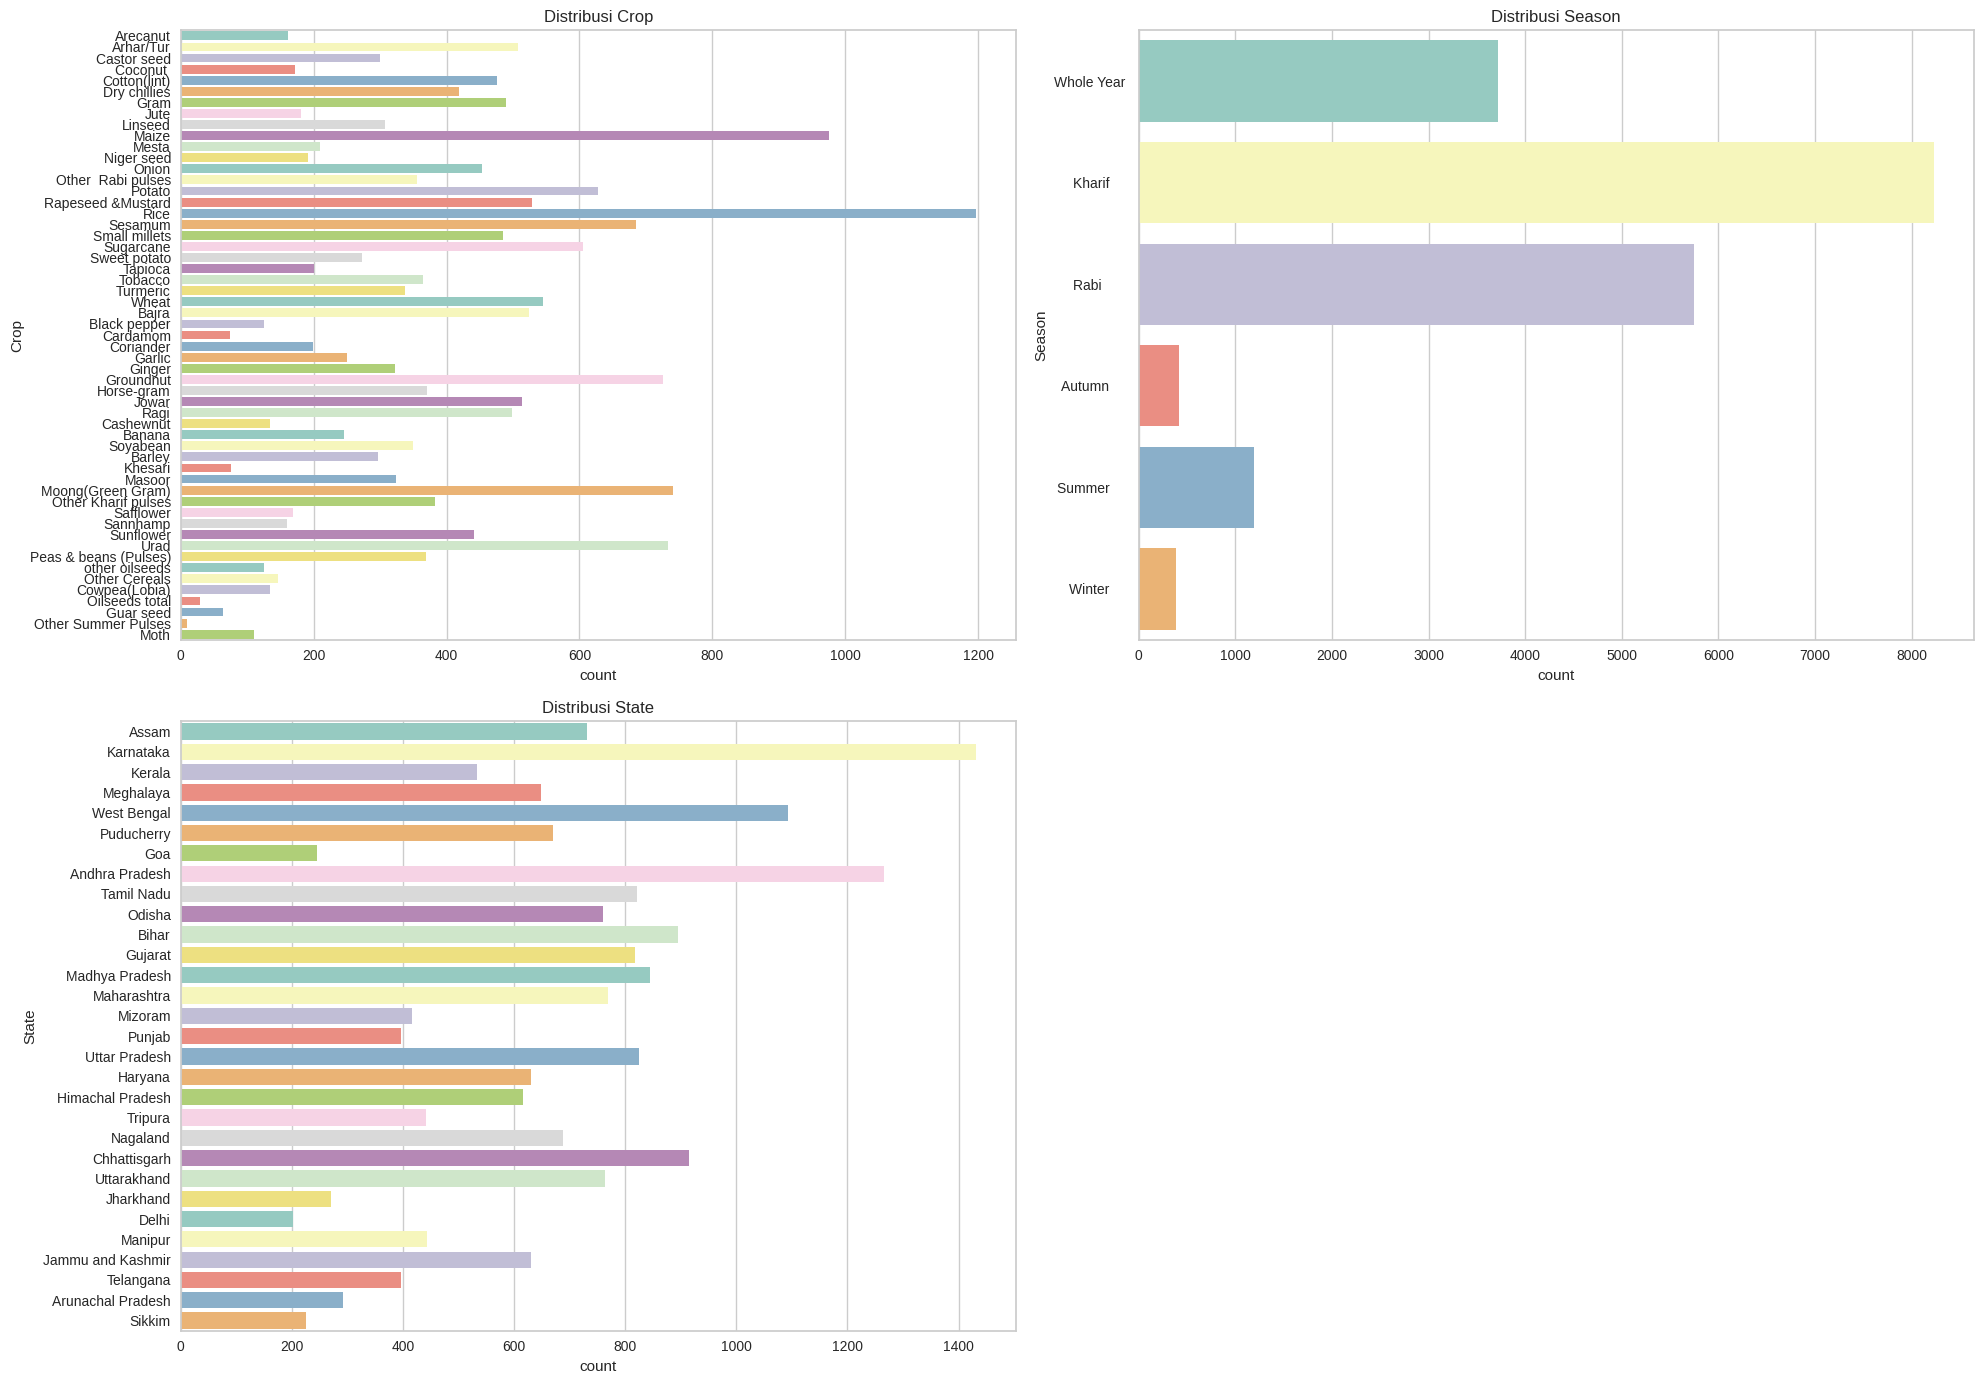

In [ ]:
# Distribusi fitur kategorikal
cat_features = crop_df.select_dtypes(include=[object])
plt.figure(figsize=(20, 14))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=crop_df[column], hue=crop_df[column], palette='Set3')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

**Heatmap korelasi**

Heatmap korelasi digunakan untuk memvisualisasikan hubungan antar fitur dalam dataset.

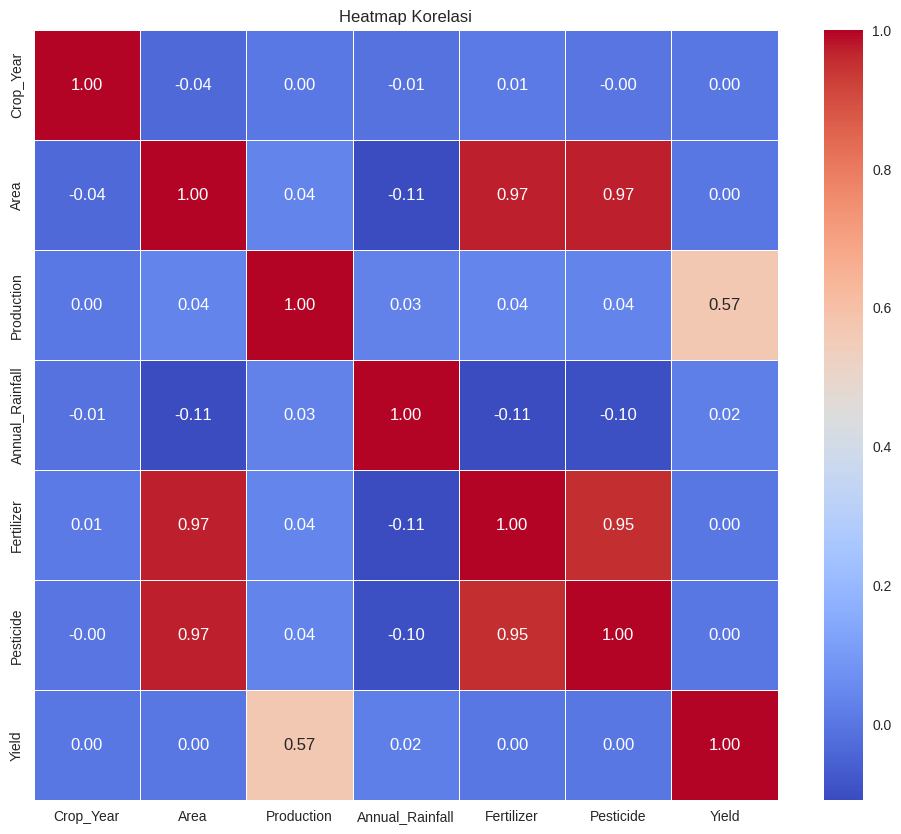

In [ ]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Nilai korelasi:
1. Korelasi Positif: nilai korelasi positif menunjukkan bahwa saat satu variabel meningkat, variabel lain juga cenderung meningkat. Nilai korelasi +1 menunjukkan korelasi positif sempurna.
2. Korelasi Negatif: nilai korelasi negatif menunjukkan bahwa saat satu variabel meningkat, variabel lain cenderung menurun. Nilai korelasi -1 menunjukkan korelasi negatif sempurna.
3. Korelasi Nol: nilai korelasi 0 menunjukkan bahwa tidak ada hubungan linier antara dua variabel.

Beberapa poin penting yang bisa diambil dari analisis korelasi di atas antara lain sebagai berikut.

* Ada korelasi positif yang kuat antara variabel tertentu,
seperti antara Area, Pesticide dan Fertilizer yang menunjukkan bahwa luas area berhubungan erat dengan jumlah pestisida dan pupuk yang digunakan. Ini berarti saat nilai pada satu kolom meningkat, kemungkinan nilai pada kolom lainnya juga akan meningkat.
* Korelasi negatif atau rendah juga terlihat pada beberapa pasangan variabel, menunjukkan hubungan yang lemah atau tidak ada antara variabel tersebut.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

## **Menghapus atau Menangani Data Kosong (Missing Values)**

In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = crop_df.isnull().sum()
missing_values[missing_values > 0]

,0


Dataset tidak memiliki data kosong(missing value).

## **Menghapus Data Duplikat**

In [ ]:
# Mengidentifikasi baris duplikat
duplicates = crop_df.duplicated()

print("Baris duplikat:")
print(crop_df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Crop, Crop_Year, Season, State, Area, Production, Annual_Rainfall, Fertilizer, Pesticide, Yield]
Index: []


Tidak ada data yang terindikasi duplikat.

## **4. Deteksi dan Penanganan Outlier**

Memeriksa dataset yang digunakan apakah memiliki outlier.

In [ ]:
# Membuat salinan data untuk menjaga data asli tetap utuh
crop_cleaned = crop_df.copy()
num2_features = crop_cleaned.select_dtypes(include=[np.number]).columns
cat2_features = crop_cleaned.select_dtypes(include=[object]).columns
print(num2_features)
print(cat2_features)

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield'],
      dtype='object')
Index(['Crop', 'Season', 'State'], dtype='object')


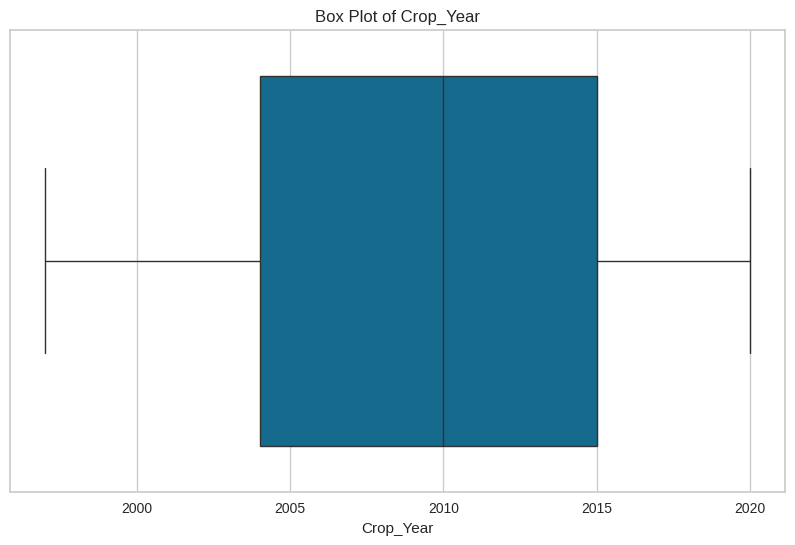

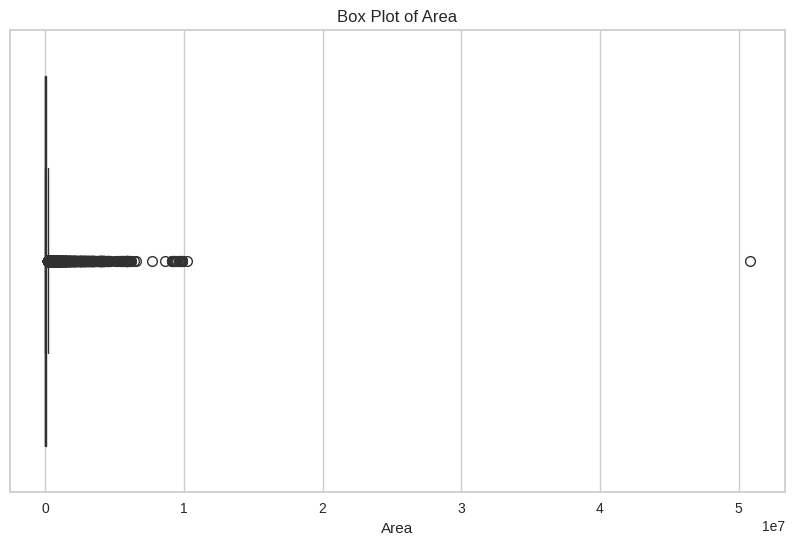

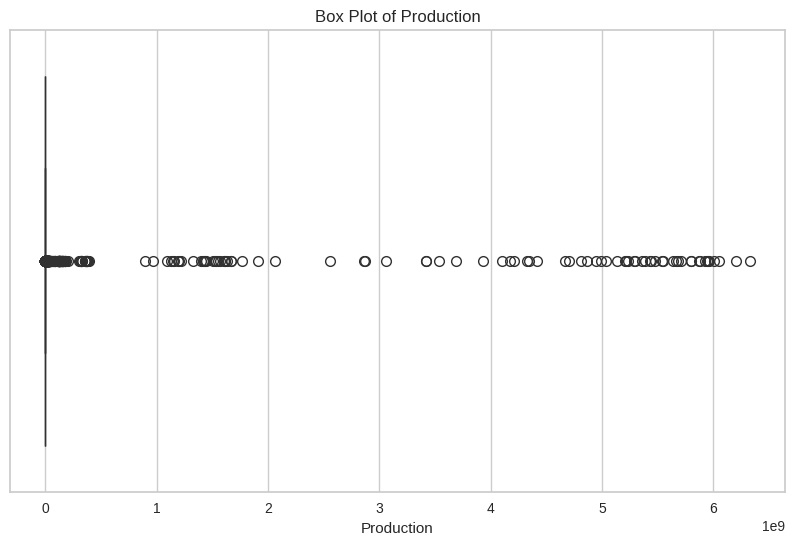

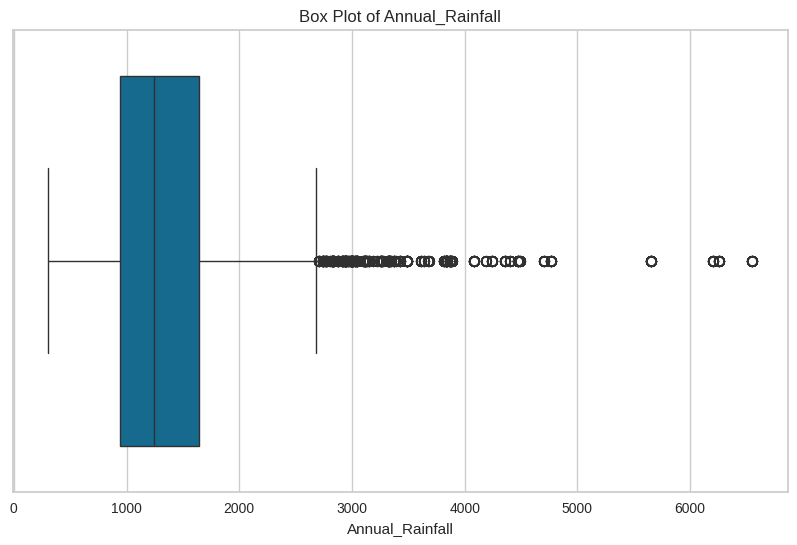

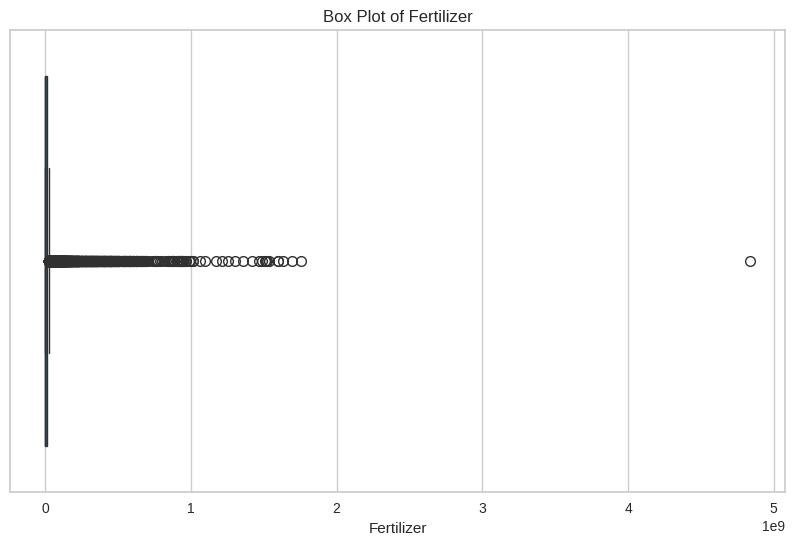

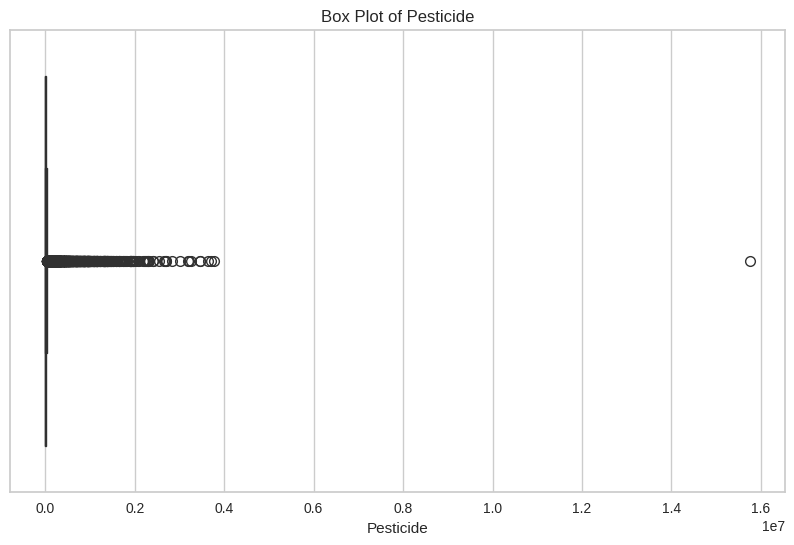

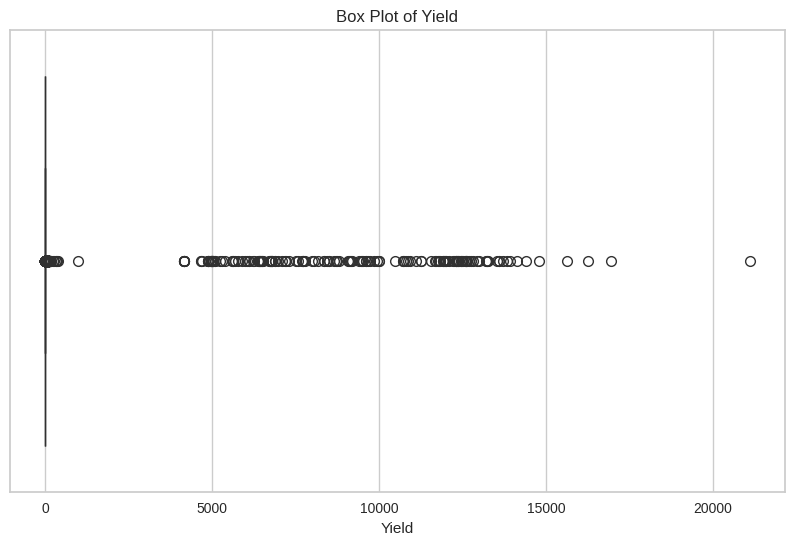

In [ ]:
for feature in num2_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=crop_cleaned[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
# Hitung Q1, Q3, dan IQR untuk deteksi outlier
Q1 = crop_cleaned[num2_features].quantile(0.25)
Q3 = crop_cleaned[num2_features].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loop untuk imputasi outlier dengan median
for column in num2_features:
    # Imputasi nilai di luar batas dengan median kolom
    crop_cleaned[column] = crop_cleaned[column].apply(
        lambda x: crop_cleaned[column].median() if x < lower_bound[column] or x > upper_bound[column] else x
    )

In [ ]:
# Lihat hasil statistik deskriptif setelah imputasi
crop_cleaned.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,19689.000000,19689.000000,19689.000000,1.968900e+04,19689.000000,19689.000000
mean,2009.127584,21536.442299,30880.926304,1258.728669,2.838407e+06,5743.894111,1.154590
std,6.498099,36258.359109,55220.954807,479.381661,4.738213e+06,9711.430461,0.859514
min,1997.000000,0.500000,0.000000,301.300000,5.417000e+01,0.090000,0.000000
25%,2004.000000,1390.000000,1393.000000,940.700000,1.880146e+05,356.700000,0.600000
50%,2010.000000,9317.000000,13804.000000,1247.600000,1.234957e+06,2421.900000,1.030000
75%,2015.000000,19100.000000,25789.000000,1451.400000,2.566898e+06,5140.720000,1.356364
max,2020.000000,185670.000000,304516.000000,2678.500000,2.468289e+07,49550.860000,5.070800


 Visualisasi data yang telah melewati tahapan penanganan outliers.

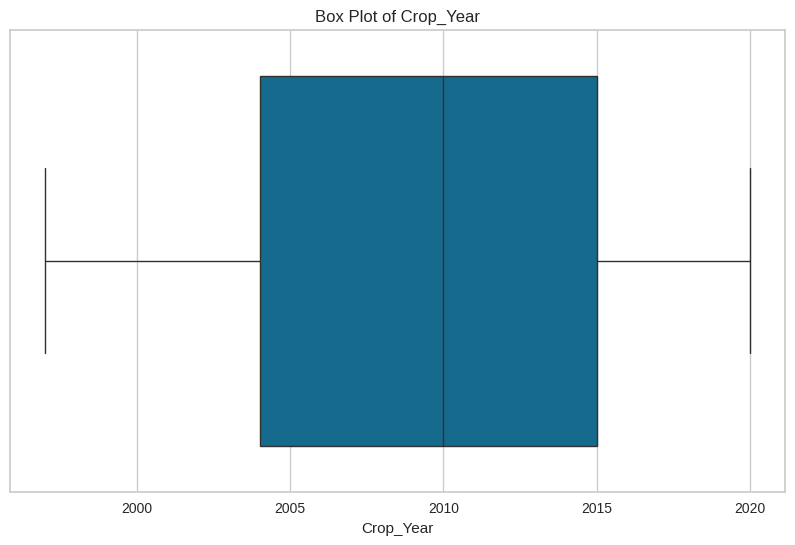

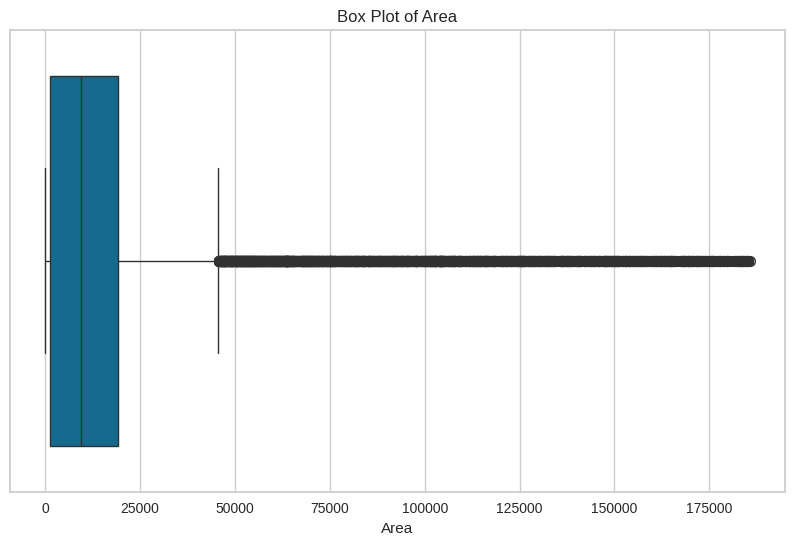

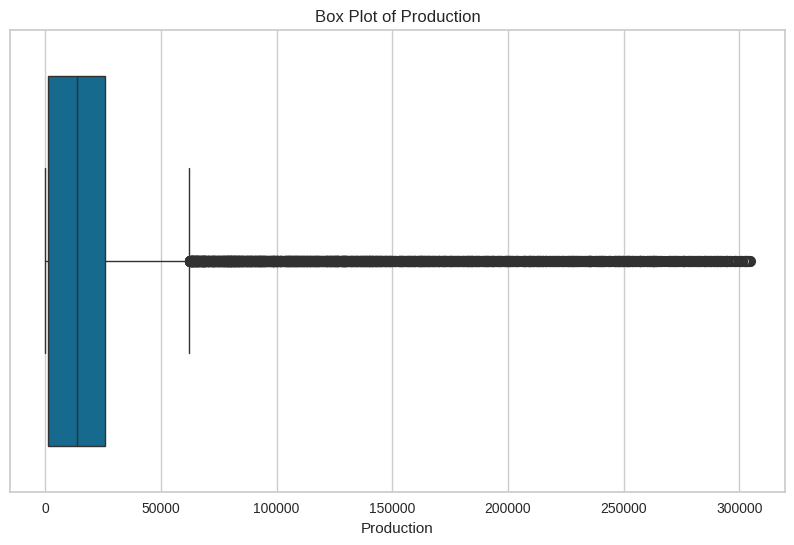

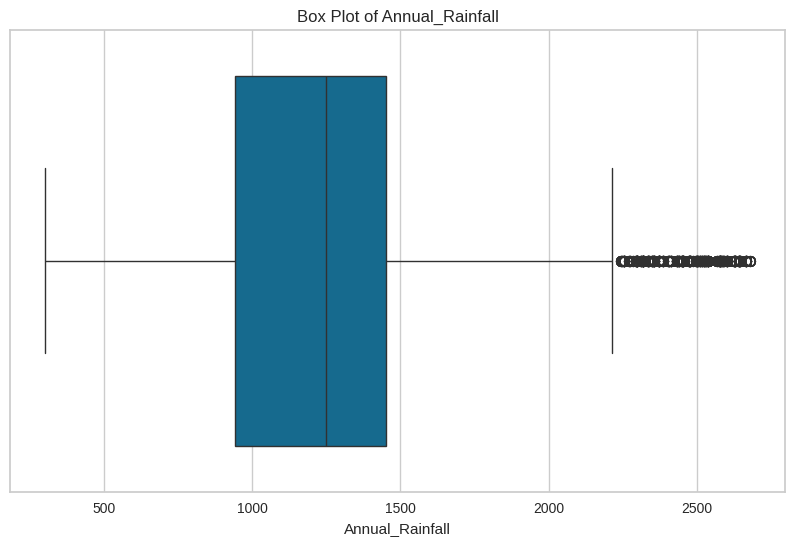

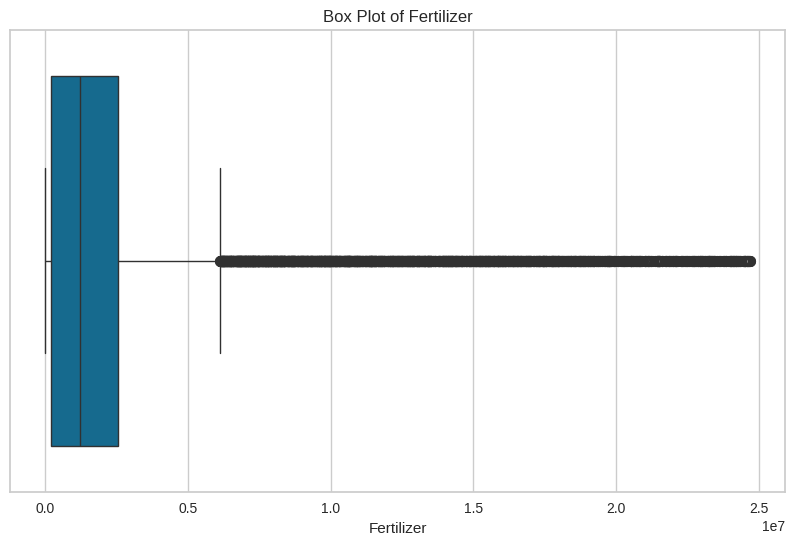

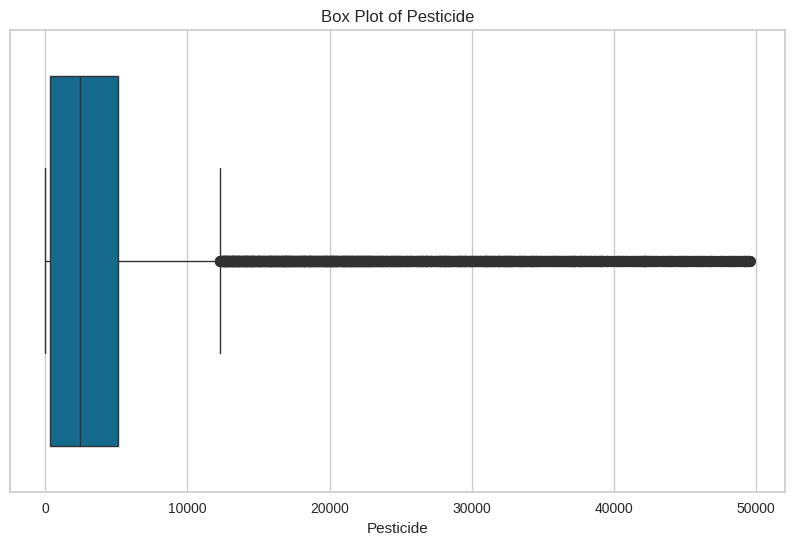

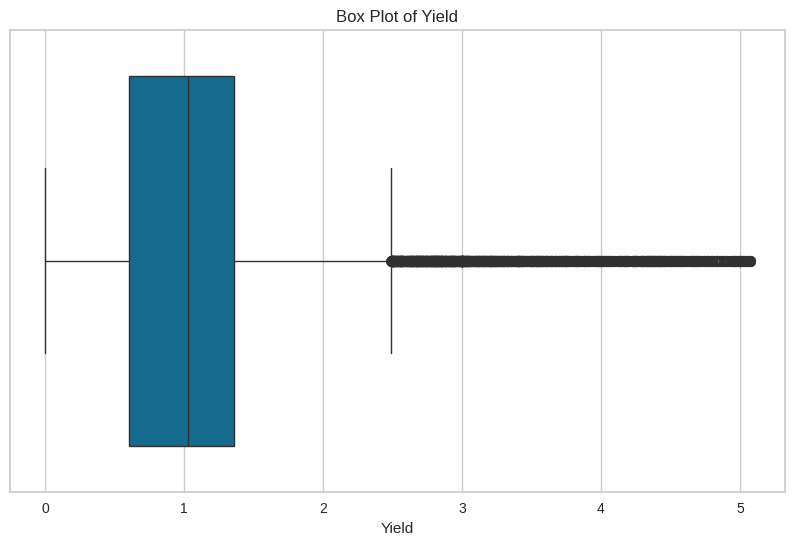

In [ ]:
for feature in num2_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=crop_cleaned[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

## **Normalisasi atau Standarisasi Fitur**

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

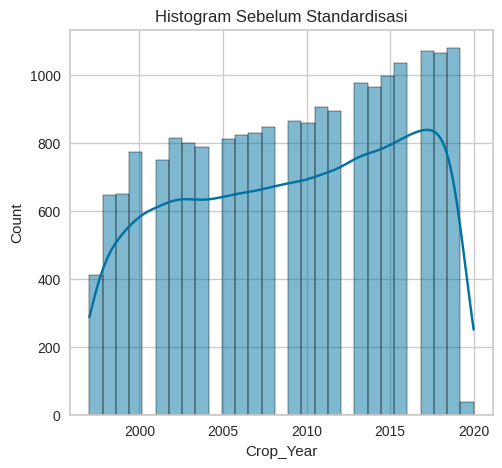

In [ ]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(crop_cleaned[num2_features[0]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

In [ ]:
from sklearn.preprocessing import RobustScaler
# Standardisasi fitur numerik
robust_scaler = RobustScaler()
# Terapkan scaling pada data
crop_cleaned[num2_features] = robust_scaler.fit_transform(crop_cleaned[num2_features])

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

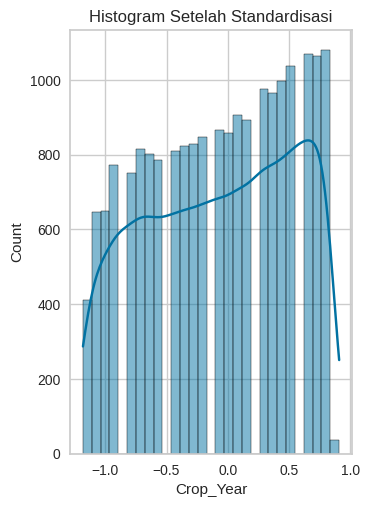

In [ ]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(crop_cleaned[num2_features[0]], kde=True)
plt.title("Histogram Setelah Standardisasi")

In [ ]:
crop_cleaned.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000
mean,-0.079311,0.689974,0.699989,0.021791,0.674034,0.694394,0.164722
std,0.590736,2.047338,2.263525,0.938676,1.991780,2.029973,1.136377
min,-1.181818,-0.526059,-0.565830,-1.852947,-0.519111,-0.506229,-1.361779
25%,-0.545455,-0.447600,-0.508731,-0.600940,-0.440098,-0.431687,-0.568510
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.454545,0.552400,0.491269,0.399060,0.559902,0.568313,0.431490
max,0.909091,9.957820,11.916380,2.801841,9.856700,9.851330,5.342404


## **Binning (Pengelompokan Data)**

### **Kolom Kategori**

#### **Kolom Crop**

In [ ]:
crop_counts = crop_cleaned['Crop'].value_counts()
total_crop = crop_counts.sum()
crop_percentage = ((crop_counts / total_crop) * 100)

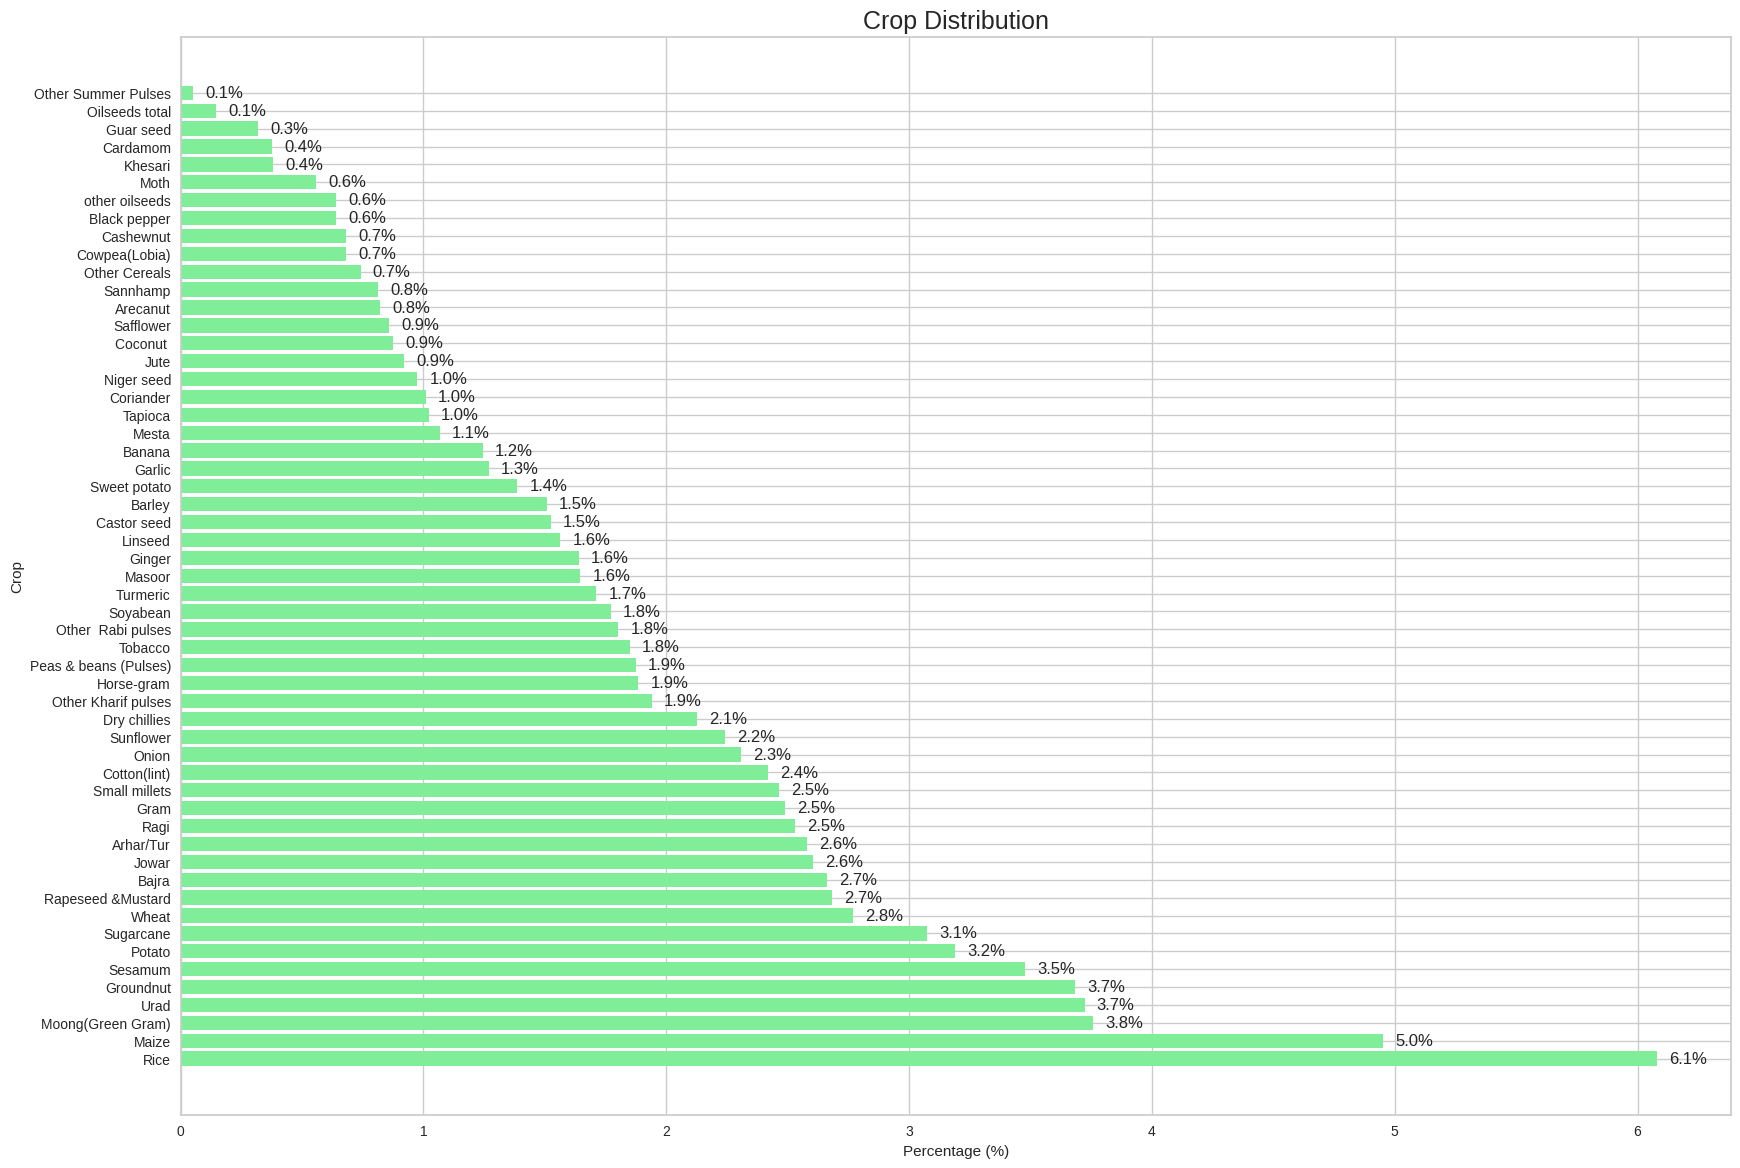

In [ ]:
# Membuat Bar Chart Horizontal
plt.figure(figsize=(20, 14))
plt.barh(crop_percentage.index, crop_percentage.values, color='#80ed99', linewidth=0)

# Menambahkan label dan judul
plt.xlabel('Percentage (%)')
plt.ylabel('Crop')
plt.title('Crop Distribution', fontsize=18)

# Menampilkan nilai persentase di sebelah kanan setiap bar
for i in range(len(crop_percentage)):
    plt.text(crop_percentage.iloc[i] + 0.05, i, f'{crop_percentage.iloc[i]:.1f}%', va='center', ha='left')

plt.show()


Dari diagram yang ditampilkan, kita dapat ketahui bahwa persentase tanaman terbesar adalah Rice dengan proporsi sebesar 6.1% dan persentase tanaman yang terkecil adalah oilseed total dan other summer pulses yang memiliki persentase sebesar 0.1%.

#### **Kolom Season**

**Menghitung distribusi Season dan menampilkan pie chart untuk visualisasi**

In [ ]:
season_counts = crop_cleaned['Season'].value_counts()

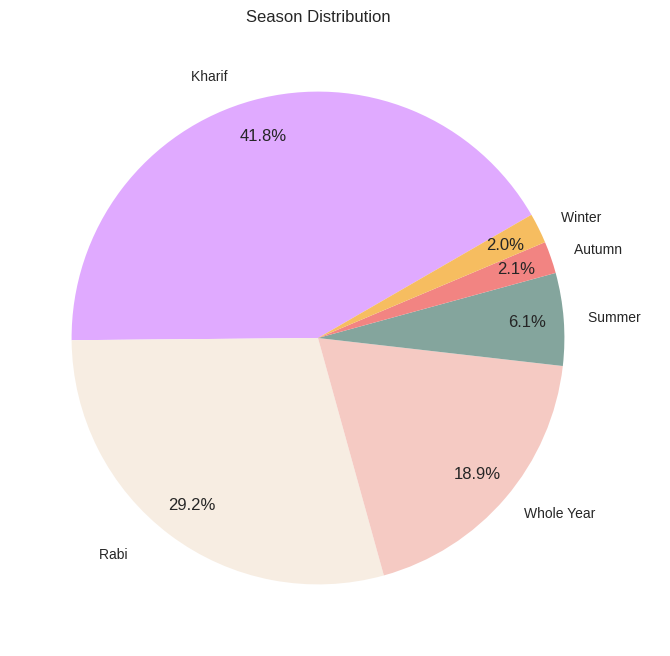

In [ ]:
colors = ['#e0aaff', '#f7ede2', '#f5cac3', '#84a59d', '#f28482', '#f6bd60']

plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=30, pctdistance=0.85, colors=colors)
plt.title('Season Distribution')
plt.show()

Dari pie chart yang ditampilkan, kita dapat ketahui bahwa persentase musim yang paling besar adalah Kharif dengan proporsi sebesar 41.8% dan persentase musim yang paling kecil adalah Winter dengan proporsi sebesar 2.0%.

#### **Kolom State**

In [ ]:
state_counts = crop_cleaned['State'].value_counts()

total_count = state_counts.sum()
# Menghitung persentase untuk setiap state
state_percentage = ((state_counts / total_count) * 100).sort_values(ascending=True)

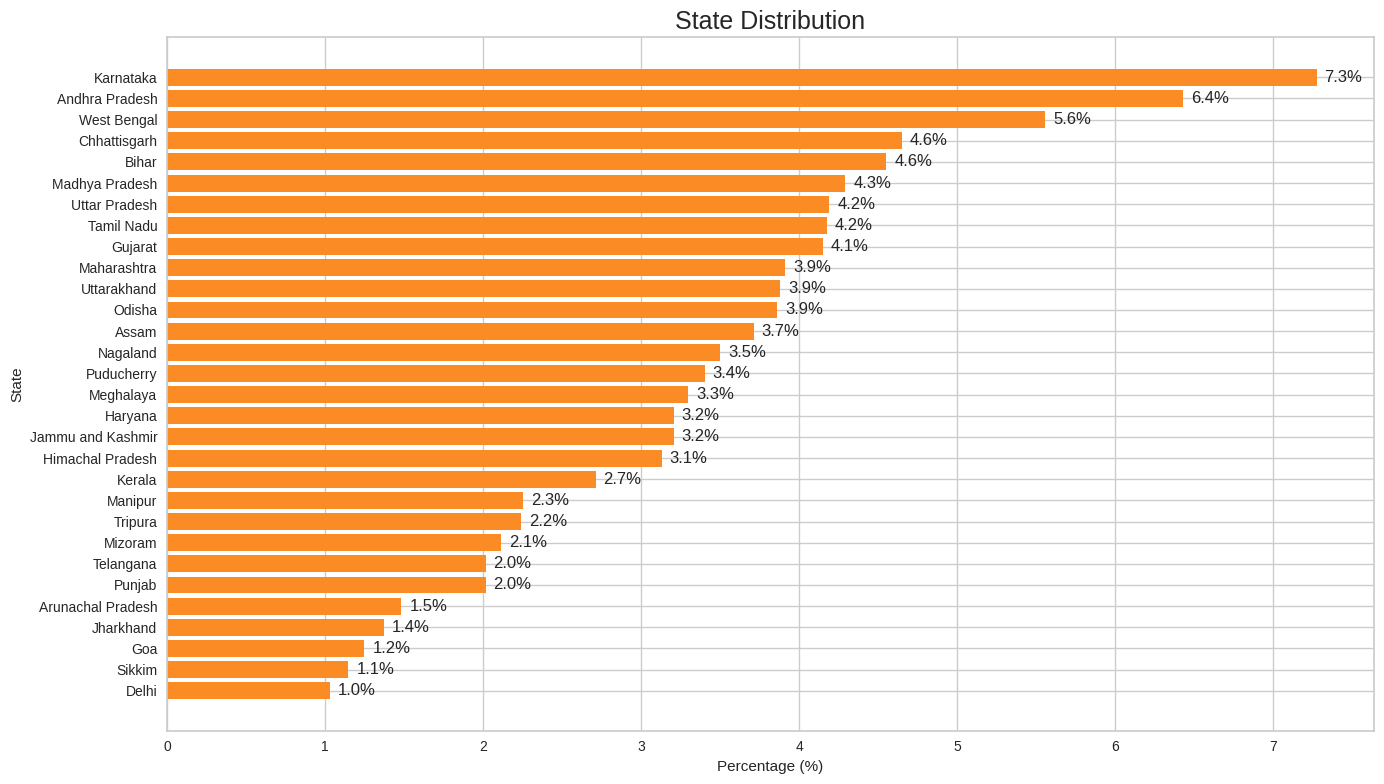

In [ ]:
# Membuat Bar Chart Horizontal
plt.figure(figsize=(14, 8))
plt.barh(state_percentage.index, state_percentage.values, color='#fb8b24')

# Menambahkan label dan judul
plt.xlabel('Percentage (%)')
plt.ylabel('State')
plt.title('State Distribution', fontsize=18)
plt.tight_layout()

# Menampilkan nilai persentase di sebelah kanan setiap bar
for i in range(len(state_percentage)):
    plt.text(state_percentage.iloc[i] + 0.05, i, f'{state_percentage.iloc[i]:.1f}%', va='center', ha='left')

plt.show()

Dari diagram yang ditampilkan, kita dapat ketahui bahwa persentase negara bagian terbesar adalah karnataka dengan proporsi sebesar 7.3% dan yang terkecil terletak di negara bagian delhi dengan persentase sebesar 1.0%.

### **Kolom Numerik**

Melakukan binning menggunakan pd.cut(). Data akan dibagi ke dalam 4 kategori atau bins berdasarkan kuartil (Q1, Q2, Q3, Q4).

Data akan dibagi menjadi empat kategori sebagai berikut:

* Q1: Data yang berada pada kuartil pertama (nilai terendah, 25% data pertama).
* Q2: Data yang berada pada kuartil kedua (nilai tengah, 25% data berikutnya).
* Q3: Data yang berada pada kuartil ketiga (nilai mendekati nilai tertinggi, 25% data setelahnya).
* Q4: Data yang berada pada kuartil keempat (nilai tertinggi, 25% data terakhir).

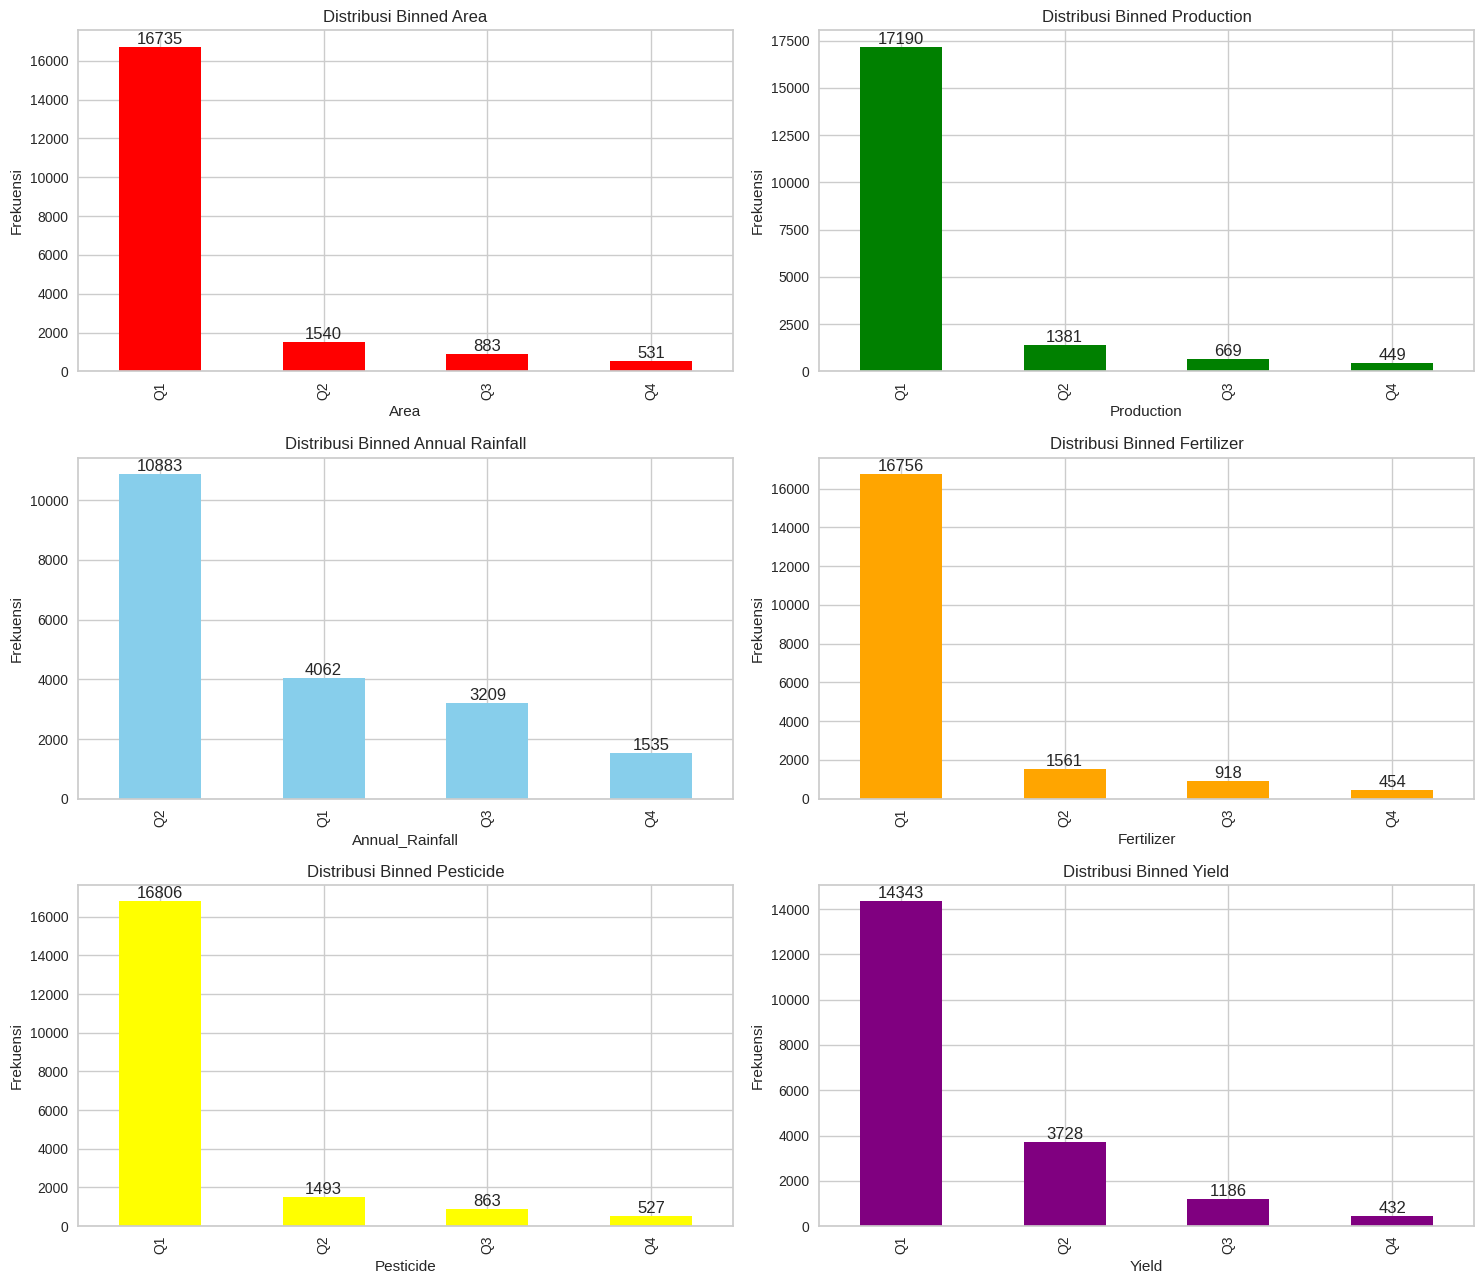

In [ ]:
# Binning berdasarkan kuartil (quartiles)
area_binned = pd.cut(crop_cleaned['Area'], bins=4, labels=["Q1", "Q2", "Q3", "Q4"])
production_binned = pd.cut(crop_cleaned['Production'], bins=4, labels=["Q1", "Q2", "Q3", "Q4"])
rain_binned = pd.cut(crop_cleaned['Annual_Rainfall'], bins=4, labels=["Q1", "Q2", "Q3", "Q4"])
fertilizer_binned = pd.cut(crop_cleaned['Fertilizer'], bins=4, labels=["Q1", "Q2", "Q3", "Q4"])
pesticide_binned = pd.cut(crop_cleaned['Pesticide'], bins=4, labels=["Q1", "Q2", "Q3", "Q4"])
yield_binned = pd.cut(crop_cleaned['Yield'], bins=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Menghitung frekuensi (jumlah data di setiap kategori bin) untuk setiap fitur
area_counts = area_binned.value_counts()
production_counts = production_binned.value_counts()
rain_counts = rain_binned.value_counts()
fertilizer_counts = fertilizer_binned.value_counts()
pesticide_counts = pesticide_binned.value_counts()
yield_counts = yield_binned.value_counts()

# Plotting diagram batang untuk distribusi binned
fig, axes = plt.subplots(3, 2, figsize=(15, 13))

# area_binned
area_counts.plot(kind='bar', ax=axes[0, 0], color='red')
axes[0, 0].set_title('Distribusi Binned Area')
axes[0, 0].set_ylabel('Frekuensi')
# Menambahkan label frekuensi di atas bar
for i in range(len(area_counts)):
    axes[0, 0].text(i, area_counts.iloc[i], area_counts.iloc[i], ha='center', va='bottom')

# production_binned
production_counts.plot(kind='bar', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribusi Binned Production')
axes[0, 1].set_ylabel('Frekuensi')
# Menambahkan label frekuensi di atas bar
for i in range(len(production_counts)):
    axes[0, 1].text(i, production_counts.iloc[i], production_counts.iloc[i], ha='center', va='bottom')

# rain_binned
rain_counts.plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Distribusi Binned Annual Rainfall')
axes[1, 0].set_ylabel('Frekuensi')
# Menambahkan label frekuensi di atas bar
for i in range(len(rain_counts)):
    axes[1, 0].text(i, rain_counts.iloc[i], rain_counts.iloc[i], ha='center', va='bottom')

# fertilizer_binned
fertilizer_counts.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribusi Binned Fertilizer')
axes[1, 1].set_ylabel('Frekuensi')
# Menambahkan label frekuensi di atas bar
for i in range(len(fertilizer_counts)):
    axes[1, 1].text(i, fertilizer_counts.iloc[i], fertilizer_counts.iloc[i], ha='center', va='bottom')

# pesticide_binned
pesticide_counts.plot(kind='bar', ax=axes[2, 0], color='yellow')
axes[2, 0].set_title('Distribusi Binned Pesticide')
axes[2, 0].set_ylabel('Frekuensi')
# Menambahkan label frekuensi di atas bar
for i in range(len(pesticide_counts)):
    axes[2, 0].text(i, pesticide_counts.iloc[i], pesticide_counts.iloc[i], ha='center', va='bottom')

# Yield_binned
yield_counts.plot(kind='bar', ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Distribusi Binned Yield')
axes[2, 1].set_ylabel('Frekuensi')
# Menambahkan label frekuensi di atas bar
for i in range(len(yield_counts)):
    axes[2, 1].text(i, yield_counts.iloc[i], yield_counts.iloc[i], ha='center', va='bottom')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [ ]:
print("Menampilkan statistik Area berdasarkan binned values")
area_desc = crop_cleaned['Area'].groupby(area_binned, observed=False).describe()
print(area_desc)
print()

print("Menampilkan statistik Production berdasarkan binned values")
production_desc = crop_cleaned['Production'].groupby(production_binned, observed=False).describe()
print(production_desc)
print()

print("Menampilkan statistik Annual_Rainfall berdasarkan binned values")
rain_desc = crop_cleaned['Annual_Rainfall'].groupby(rain_binned, observed=False).describe()
print(rain_desc)
print()

print("Menampilkan statistik Fertilizer berdasarkan binned values")
fertilizer_desc = crop_cleaned['Fertilizer'].groupby(fertilizer_binned, observed=False).describe()
print(fertilizer_desc)

print("Menampilkan statistik Pesticide berdasarkan binned values")
pesticide_desc = crop_cleaned['Pesticide'].groupby(pesticide_binned, observed=False).describe()
print(pesticide_desc)
print()

print("Menampilkan statistik Yield berdasarkan binned values")
yield_desc = crop_cleaned['Yield'].groupby(yield_binned, observed=False).describe()
print(yield_desc)

Menampilkan statistik Area berdasarkan binned values
        count      mean       std       min       25%       50%       75%  \
Area                                                                        
Q1    16735.0 -0.066468  0.538880 -0.526059 -0.472219 -0.215923  0.000000   
Q2     1540.0  3.226872  0.750365  2.095257  2.564257  3.114653  3.807835   
Q3      883.0  5.876021  0.741422  4.717335  5.255110  5.792490  6.511547   
Q4      531.0  8.548664  0.731808  7.338058  7.918295  8.509091  9.146781   

           max  
Area            
Q1    2.094636  
Q2    4.715302  
Q3    7.335347  
Q4    9.957820  

Menampilkan statistik Production berdasarkan binned values
              count       mean       std       min       25%        50%  \
Production                                                                
Q1          17190.0  -0.053569  0.642740 -0.565830 -0.526224  -0.250205   
Q2           1381.0   3.891758  0.899800  2.555542  3.069274   3.816773   
Q3            669.0   

## **Encoding Data Kategorikal**

Melihat data kategorikal yang ada pada dataset.

In [ ]:
crop_cleaned[cat2_features]

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(lint),Kharif,Assam
...,...,...,...
19684,Small millets,Kharif,Nagaland
19685,Wheat,Rabi,Nagaland
19686,Maize,Kharif,Jammu and Kashmir
19687,Rice,Kharif,Jammu and Kashmir


LabelEncoder digunakan untuk mengonversi nilai kategorikal menjadi format numerik yang dapat diproses oleh model.

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
crop_lencoder = pd.DataFrame(crop_cleaned)

for col in cat2_features:
    crop_lencoder[col] = label_encoder.fit_transform(crop_cleaned[col])

# Menampilkan hasil
crop_lencoder

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,-1.181818,4,2,3.641841,1.758649,1.573918,2.433882,4.276830,-0.309260
1,1,-1.181818,1,2,-0.151327,-0.373791,1.573918,-0.253612,-0.076177,-0.422502
2,8,-1.181818,1,2,-0.481141,-0.564929,1.573918,-0.487288,-0.454668,-1.046675
3,9,-1.181818,4,2,0.583794,0.000000,1.573918,0.267228,0.767442,0.000000
4,11,-1.181818,1,2,-0.427894,-0.533284,1.573918,-0.449563,-0.393562,-0.805288
...,...,...,...,...,...,...,...,...,...,...
19684,44,-1.090909,1,19,-0.300226,-0.483850,0.490307,-0.353005,-0.263774,-0.700721
19685,53,-1.090909,2,19,-0.469622,-0.442859,0.490307,-0.477601,-0.445629,2.604567
19686,24,-1.181818,1,10,0.000000,0.000000,0.212649,0.000000,0.000000,0.337139
19687,40,-1.181818,1,10,0.000000,-0.340876,0.212649,0.000000,0.000000,-1.339744


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Mengambil kolom 'Area' , 'Annual_Rainfall', 'Fertilizer', 'Pesticide, dan 'Production' dari dataset dan menyimpannya dalam array X_cleaned
X_cleaned = crop_cleaned.iloc[:, [4, 5, 6, 7, 8, 9]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X_cleaned, columns=['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']))

           Area  Production  Annual_Rainfall  Fertilizer  Pesticide     Yield
0      3.641841    1.758649         1.573918    2.433882   4.276830 -0.309260
1     -0.151327   -0.373791         1.573918   -0.253612  -0.076177 -0.422502
2     -0.481141   -0.564929         1.573918   -0.487288  -0.454668 -1.046675
3      0.583794    0.000000         1.573918    0.267228   0.767442  0.000000
4     -0.427894   -0.533284         1.573918   -0.449563  -0.393562 -0.805288
...         ...         ...              ...         ...        ...       ...
19684 -0.300226   -0.483850         0.490307   -0.353005  -0.263774 -0.700721
19685 -0.469622   -0.442859         0.490307   -0.477601  -0.445629  2.604567
19686  0.000000    0.000000         0.212649    0.000000   0.000000  0.337139
19687  0.000000   -0.340876         0.212649    0.000000   0.000000 -1.339744
19688  0.000000    0.000000         0.212649    9.056103   0.000000  0.306490

[19689 rows x 6 columns]


Membangun model clustering menggunakan KMeans

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### **Elbow Method**

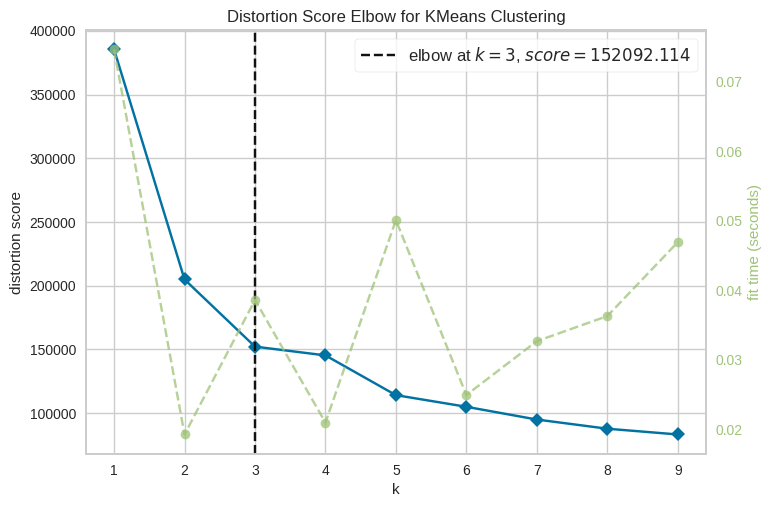

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_cleaned)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Dengan jumlah cluster yang sudah ditentukan sebanyak 3, kita dapat melanjutkan dengan membangun model clustering menggunakan KMeans.

### **Silhouette Score**

In [ ]:
silhouette_scores = []

# Menghitung Silhouette Score
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_cleaned)
    score = silhouette_score(X_cleaned, clusters)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {n_clusters} Silhouette Score:  {score:.2f}")

# Menampilkan nilai terbaik
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah klaster optimal berdasarkan Silhouette Score adalah {optimal_clusters}")

Jumlah Cluster: 2 Silhouette Score:  0.62
Jumlah Cluster: 3 Silhouette Score:  0.61
Jumlah Cluster: 4 Silhouette Score:  0.52
Jumlah Cluster: 5 Silhouette Score:  0.45
Jumlah Cluster: 6 Silhouette Score:  0.47
Jumlah Cluster: 7 Silhouette Score:  0.37
Jumlah Cluster: 8 Silhouette Score:  0.37
Jumlah Cluster: 9 Silhouette Score:  0.37
Jumlah Cluster: 10 Silhouette Score:  0.38
Jumlah klaster optimal berdasarkan Silhouette Score adalah 2


In [ ]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans2 = KMeans(n_clusters=3, random_state=42)
clusters = kmeans2.fit_predict(X_cleaned)

# Hitung Silhouette Score
silhouette = silhouette_score(X_cleaned, clusters)

# Tampilkan hasil
print(f'Silhouette Score: {silhouette:.2f}')

Silhouette Score: 0.61


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Terapkan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)  # Mengurangi menjadi 2 komponen
X_pca = pca.fit_transform(X_cleaned)

# Menampilkan hasil feature selection dengan PCA
print(f"Dimensi data original: {X_cleaned.shape}")
print(f"Dimensi data setelah PCA: {X_pca.shape}")

Dimensi data original: (19689, 6)
Dimensi data setelah PCA: (19689, 2)


**Pemodelan dan Evaluasi**

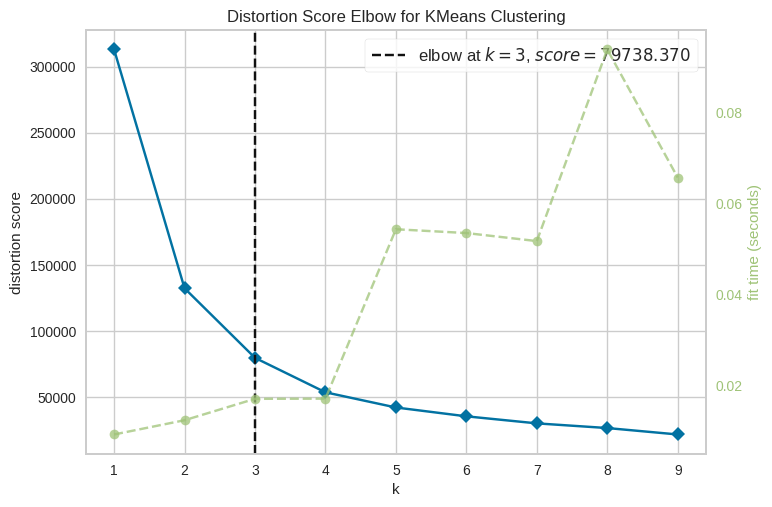

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_pca)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
silhouette_scores_pca = []

# Menghitung Silhouette Score
for n_clusters_pca in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters_pca, random_state=42)
    clusters_pca = kmeans.fit_predict(X_pca)
    score_pca = silhouette_score(X_pca, clusters_pca)
    silhouette_scores_pca.append(score_pca)
    print(f"Jumlah Cluster: {n_clusters_pca} Silhouette Score:  {score_pca:.2f}")

# Menampilkan nilai terbaik
optimal_clusters_pca = range(2, 11)[silhouette_scores_pca.index(max(silhouette_scores_pca))]
print(f"Jumlah klaster optimal berdasarkan Silhouette Score adalah {optimal_clusters_pca}")

Jumlah Cluster: 2 Silhouette Score:  0.71
Jumlah Cluster: 3 Silhouette Score:  0.72
Jumlah Cluster: 4 Silhouette Score:  0.69
Jumlah Cluster: 5 Silhouette Score:  0.60
Jumlah Cluster: 6 Silhouette Score:  0.62
Jumlah Cluster: 7 Silhouette Score:  0.61
Jumlah Cluster: 8 Silhouette Score:  0.51
Jumlah Cluster: 9 Silhouette Score:  0.52
Jumlah Cluster: 10 Silhouette Score:  0.51
Jumlah klaster optimal berdasarkan Silhouette Score adalah 3


In [ ]:
# Inisialisasi dan melatih model KMeans pada data setelah PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Menghitung Silhouette Score untuk data setelah PCA
silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score (Setelah PCA): {silhouette_pca:.2f}")


Silhouette Score (Setelah PCA): 0.72


In [ ]:
print("Sebelum Feature Selection")
print(f"Dimensi data original: {X_cleaned.shape}")
print(f"Jumlah klaster optimal berdasarkan Silhouette Score adalah {optimal_clusters}")
print(f"Silhouette Score (Setelah PCA): {silhouette:.2f}")
print()
print("Setelah Feature Selection")
print(f"Dimensi data setelah PCA: {X_pca.shape}")
print(f"Jumlah klaster optimal berdasarkan Silhouette Score adalah {optimal_clusters_pca}")
print(f"Silhouette Score (Setelah PCA): {silhouette_pca:.2f}")

Sebelum Feature Selection
Dimensi data original: (19689, 6)
Jumlah klaster optimal berdasarkan Silhouette Score adalah 2
Silhouette Score (Setelah PCA): 0.61

Setelah Feature Selection
Dimensi data setelah PCA: (19689, 2)
Jumlah klaster optimal berdasarkan Silhouette Score adalah 3
Silhouette Score (Setelah PCA): 0.72


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

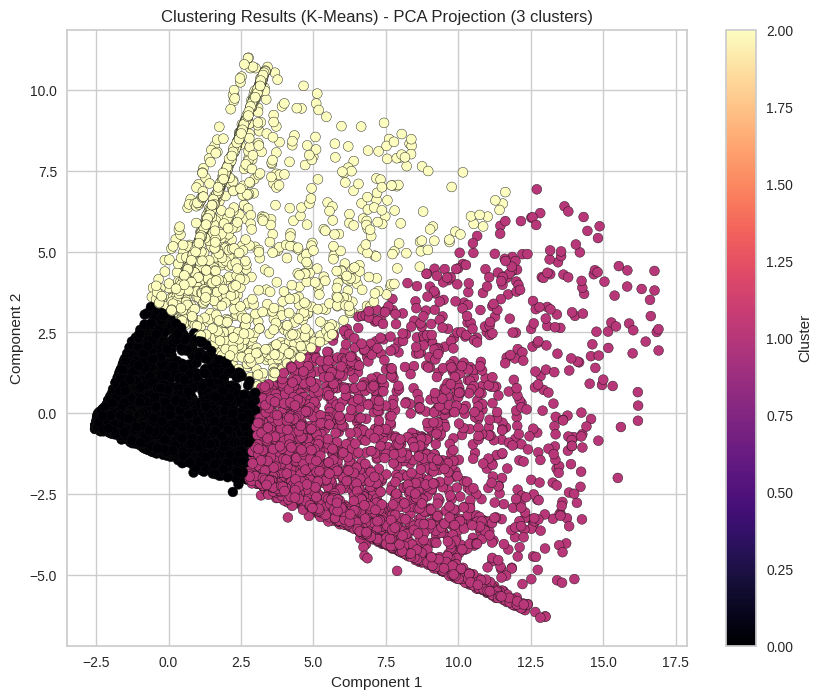

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Cluster
0,Arecanut,-1.181818,Whole Year,Assam,3.641841,1.758649,1.573918,2.433882,4.276830,-0.309260,1
1,Arhar/Tur,-1.181818,Kharif,Assam,-0.151327,-0.373791,1.573918,-0.253612,-0.076177,-0.422502,0
2,Castor seed,-1.181818,Kharif,Assam,-0.481141,-0.564929,1.573918,-0.487288,-0.454668,-1.046675,0
3,Coconut,-1.181818,Whole Year,Assam,0.583794,0.000000,1.573918,0.267228,0.767442,0.000000,0
4,Cotton(lint),-1.181818,Kharif,Assam,-0.427894,-0.533284,1.573918,-0.449563,-0.393562,-0.805288,0


In [ ]:
# Menyimpan hasil clustering
crop_clustered = crop_cleaned.copy()
crop_clustered['Cluster'] = clusters_pca

# Mendapatkan jumlah cluster
k = 3

# Visualisasi Hasil Clustering menggunakan Scatter Plot 2D (PCA)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=crop_clustered['Cluster'], cmap='magma', edgecolors='k', s=50)
plt.title(f'Clustering Results (K-Means) - PCA Projection ({k} clusters)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Menampilkan beberapa data dengan cluster
crop_clustered.head()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Analisis Sesudah Feature Selection**

In [ ]:
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X_pca, clusters_pca, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_pca_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data_pca = X_pca[clusters_pca == cluster_pca_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_component_1 = cluster_data_pca[:, 0].mean()  # Rata-rata komponen utama 1
        mean_component_2 = cluster_data_pca[:, 1].mean()  # Rata-rata komponen utama 2

        print(f"\nCluster {cluster_pca_id + 1}:")
        print(f"Rata-rata Component 1: {mean_component_1:.4f}")
        print(f"Rata-rata Component 2: {mean_component_2:.4f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X_pca, clusters_pca, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Component 1: -1.4776
Rata-rata Component 2: -0.2292

Cluster 2:
Rata-rata Component 1: 7.2649
Rata-rata Component 2: -1.4520

Cluster 3:
Rata-rata Component 1: 2.8014
Rata-rata Component 2: 5.5193


Hasil interpretasi:
1. Cluster 1:

  **Rata-rata:**
  * Component 1: -1.0719
  * Component 2: -0.1188

  **Analisis:**
  Cluster ini berisi data yang rendah di kedua komponen. cluster ini bisa mewakili kondisi yang kurang produktif atau kondisi lingkungan yang kurang baik.

2. Cluster 2:

  **Rata-rata:**
  * Component 1: 10.4785
  * Component 2: -3.9645

  **Analisis:**
  Cluster ini menunjukkan nilai positif pada komponen 1 dan negatif pada Component 2. Cluster ini mungkin memiliki kondisi yang baik di komponen 1 dan sebaliknya di komponen 2 memiliki kondisi yang tidak baik.

3. Cluster 3:

  **Rata-rata:**
  * Component 1: 6.9653
  * Component 2: 4.8715

  **Analisis:**

  Cluster ini menunjukkan nilai positif tinggi pada kedua komponen, yang berarti data di cluster ini memiliki kondisi yang lebih baik di kedua dimensi yang dianalisis.

**Analisis Sebelum Feature Selection**

In [ ]:
k = 3
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X_cleaned, clusters, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X_cleaned[clusters == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_area = cluster_data[:, 0].mean()  # Rata-rata Area
        mean_production = cluster_data[:, 1].mean()  # Rata-rata Production
        mean_rain = cluster_data[:, 2].mean()  # Rata-rata Annual_Rainfall
        mean_fertilizer = cluster_data[:, 3].mean()  # Rata-rata Fertilizer
        mean_pesticide = cluster_data[:, 4].mean()  # Rata-rata Pesticide
        mean_yield = cluster_data[:, 5].mean()  # Rata-rata Yield

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Area: {mean_area:.2f}")
        print(f"Rata-rata Production: {mean_production:.2f}")
        print(f"Rata-rata Annual_Rainfall: {mean_rain:.2f}")
        print(f"Rata-rata Fertilizer: {mean_fertilizer:.2f}")
        print(f"Rata-rata Pesticide: {mean_pesticide:.2f}")
        print(f"Rata-rata Yield: {mean_yield:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X_cleaned, clusters, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Area: -0.06
Rata-rata Production: -0.10
Rata-rata Annual_Rainfall: 0.08
Rata-rata Fertilizer: -0.05
Rata-rata Pesticide: -0.03
Rata-rata Yield: 0.16

Cluster 2:
Rata-rata Area: 4.98
Rata-rata Production: 2.29
Rata-rata Annual_Rainfall: -0.20
Rata-rata Fertilizer: 4.79
Rata-rata Pesticide: 4.75
Rata-rata Yield: 0.10

Cluster 3:
Rata-rata Area: 0.80
Rata-rata Production: 6.96
Rata-rata Annual_Rainfall: -0.21
Rata-rata Fertilizer: 0.81
Rata-rata Pesticide: 0.96
Rata-rata Yield: 0.33


Hasil interpretasi.
1. Cluster 1:

  **Rata-rata:**
    * Area: -0.06 (Luas area relatif kecil)
    * Production: -0.10 (Produksi rendah)
    * Annual Rainfall: 0.08 (Curah hujan rendah)
    * Fertilizer: -0.05 (Penggunaan pupuk sangat rendah)
    * Pesticide: -0.03 (Penggunaan pestisida rendah)
    * Yield: 0.16 (Yield rendah)

  **Analisis:**
  Cluster 1 dengan luas area yang kecil, memiliki produksi dan curah hujan yang rendah. Penggunaan pupuk dan pestisida sangat minim, menunjukkan bahwa aktivitas pertanian di cluster ini mungkin tidak baik dengan terbatasnya semua aspek yang dibutuhkan dalam proses pertanian dan hasilnya juga relatif rendah (yield rendah).

2. Cluster 2:

  **Rata-rata:**
    * Area: 4.98 (Luas area sedang)
    * Production: 2.29 (Produksi sedang)
    * Annual Rainfall: -0.20 (Curah hujan rendah)
    * Fertilizer: 4.79 (Penggunaan pupuk sedang)
    * Pesticide: 4.75 (Penggunaan pestisida sedang)
    * Yield: 0.10 (Yield rendah)

  **Analisis:**
  Cluster 2 memiliki area yang sedang dan produksi yang sedang. Penggunaan pupuk dan pestisida yang masih tergolong rendah dan kondisi curah hujan yang rendah, mengakibatkan hasil atau yield yang didapatkan rendah. Ini dapat menunjukkan adanya kondisi yang kurang optimal.

3. Cluster 3:

  **Rata-rata:**
    * Area: 0.80 (Luas area kecil)
    * Production: 6.96 (Produksi tinggi)
    * Annual Rainfall: -0.21 (Curah hujan rendah)
    * Fertilizer: 0.81 (Penggunaan pupuk rendah)
    * Pesticide: 0.96 (Penggunaan pestisida rendah)
    * Yield: 0.33 (Yield rendah)

  **Analisis:**
  Cluster 3 dengan luas area yang kecil, memiliki produksi yang tinggi dan curah hujan yang rendah. Penggunaan pupuk dan pestisida masih minim, menunjukkan bahwa aktivitas pertanian di cluster ini kurang optimal dengan terbatasnya beberapa aspek yang dibutuhkan dalam proses pertanian dan hasilnya juga relatif rendah (yield rendah).

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
result_clustered= crop_lencoder.copy()
result_clustered['Cluster'] = clusters_pca

In [ ]:
result_clustered.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Cluster
0,0,-1.181818,4,2,3.641841,1.758649,1.573918,2.433882,4.276830,-0.309260,1
1,1,-1.181818,1,2,-0.151327,-0.373791,1.573918,-0.253612,-0.076177,-0.422502,0
2,8,-1.181818,1,2,-0.481141,-0.564929,1.573918,-0.487288,-0.454668,-1.046675,0
3,9,-1.181818,4,2,0.583794,0.000000,1.573918,0.267228,0.767442,0.000000,0
4,11,-1.181818,1,2,-0.427894,-0.533284,1.573918,-0.449563,-0.393562,-0.805288,0


In [ ]:
result_clustered.to_csv('result_clustered.csv', index=False)